#**Title of project** : **Bank Customer Churn Model**
***


#Objective
***

To Build Machine Learning model for identifying which customer leave the bank or left the bank.

- Data Encoding
- Feature Scaling
- Handling Imbalance Dataset
  - Random Under Sampling
  - Random Over Sampling
- Support Vector Machine (SVM) Classifier
- Grid Search for Hyperparameter Tuning


# Import Library
***

In [ ]:
import pandas as pd


In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

#Import Data
***

In [ ]:
df=pd.read_csv("https://github.com/YBIFoundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv")

In [ ]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


- **Dataset contains 10,000 rows and 13 columns**
- **No missing Value present in dataset**
- **Some feature are not in numerical dtype so have to convert categorical feature into numerical before training**

 Now Saggregate Numerical and categorical columns for data encoding

In [ ]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')

In [ ]:
numerical_columns=[columns for columns in df.columns if df[columns].dtype!='O']
numerical_columns

['CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'Num Of Products',
 'Has Credit Card',
 'Is Active Member',
 'Estimated Salary',
 'Churn']

In [ ]:
categorical_columns=[]
for columns in df.columns:
  if df[columns].dtype=='O':
   categorical_columns.append(columns)


In [ ]:
categorical_columns

['Surname', 'Geography', 'Gender']

In [ ]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 13)

Check data has duplicate rows or not

In [ ]:
df.duplicated().sum()

0

**Can we make CUSTOMER ID AS INDEX?**

In [ ]:
len(df['CustomerId'].unique())

10000

- No duplicate rows are present in our dataset
- All ID are Unique as well

*Lets make ID column as our index*
***

In [ ]:
df=df.set_index('CustomerId')

In [ ]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 12)

- Now columns are 12

# Data Encoding of Categorical Features

In [ ]:
categorical_columns

['Surname', 'Geography', 'Gender']

In [ ]:
df[categorical_columns[2]].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

- MALE - 0
- FEMALE -1

In [ ]:
df[categorical_columns[2]]=df[categorical_columns[2]].replace({'Male': 0 , 'Female': 1})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  int64  
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 1015.6+ KB


- Gender column becomes numerical

In [ ]:
df[categorical_columns[1]].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

- France - 0
- Germany - 1
- Spain -2

In [ ]:
df[categorical_columns[1]]=df[categorical_columns[1]].replace({'France': 0, 'Germany': 1, 'Spain': 2})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  int64  
 3   Gender            10000 non-null  int64  
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 1015.6+ KB


- Geography columns also become numerical

In [ ]:
df.drop(columns=[categorical_columns[0]], inplace=True)

In [ ]:
df.columns.shape

(11,)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,
15634602,619,0,1,42,2,0.00,1,1,1,101348.88,1
15647311,608,2,1,41,1,83807.86,1,0,1,112542.58,0
15619304,502,0,1,42,8,159660.80,3,1,0,113931.57,1
15701354,699,0,1,39,1,0.00,2,0,0,93826.63,0
15737888,850,2,1,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CreditScore,1.000000,0.007888,0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,-0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,0.002857,-0.004719,1.000000,0.027544,-0.014733,-0.012087,0.021859,-0.005766,-0.022544,0.008112,0.106512
Age,-0.003965,0.022812,0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,-0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,-0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
Num Of Products,0.012238,0.003972,0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
Has Credit Card,-0.005458,-0.008523,-0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
Is Active Member,0.025651,0.006724,-0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
Estimated Salary,-0.001384,-0.001369,0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<Axes: >

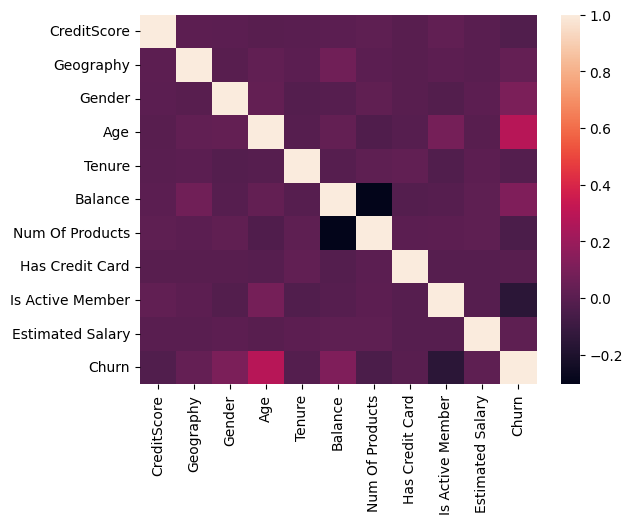

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.drop(columns='Num Of Products', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CreditScore       10000 non-null  int64  
 1   Geography         10000 non-null  int64  
 2   Gender            10000 non-null  int64  
 3   Age               10000 non-null  int64  
 4   Tenure            10000 non-null  int64  
 5   Balance           10000 non-null  float64
 6   Has Credit Card   10000 non-null  int64  
 7   Is Active Member  10000 non-null  int64  
 8   Estimated Salary  10000 non-null  float64
 9   Churn             10000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 859.4 KB


In [ ]:
df['Gender'].value_counts()

Gender
0    5457
1    4543
Name: count, dtype: int64

In [ ]:
df.groupby('Gender')['Churn'].value_counts()

Gender  Churn
0       0        4559
        1         898
1       0        3404
        1        1139
Name: count, dtype: int64

In [ ]:
df['Gender'].value_counts()

Gender
0    5457
1    4543
Name: count, dtype: int64

#**EDA- Exploratory Data Analysis**
***

In [ ]:
female_customer=df['Gender'].value_counts()[1]
male_customer=df['Gender'].value_counts()[0]

In [ ]:
male_left=df.groupby('Gender')['Churn'].value_counts()[0][1]

In [ ]:
female_left=df.groupby('Gender')['Churn'].value_counts()[1][1]

In [ ]:
male_left,male_customer

(898, 5457)

In [ ]:
female_left,female_customer

(1139, 4543)

In [ ]:
percentage_of_male_left = (male_left/male_customer)*100
percentage_of_female_left = (female_left/female_customer)*100


In [ ]:
percentage_of_male_left

16.455928165658786

In [ ]:
percentage_of_female_left

25.071538630860662

##**Conclusion**
***
###**Female customer left the bank more than Male Customer**
###- percentage of customer leaving is male -  16.5%
###- percentage of customer leaving is female -  25.1%

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,
15634602,619,0,1,42,2,0.00,1,1,101348.88,1
15647311,608,2,1,41,1,83807.86,0,1,112542.58,0
15619304,502,0,1,42,8,159660.80,1,0,113931.57,1
15701354,699,0,1,39,1,0.00,0,0,93826.63,0
15737888,850,2,1,43,2,125510.82,1,1,79084.10,0


###Similarly check for Geography and Has Credit Card, Is active meber impact on leaving or not

In [ ]:
df['Geography'].value_counts()

Geography
0    5014
1    2509
2    2477
Name: count, dtype: int64

- France - 0
- Germany - 1
- Spain -2

In [ ]:
france_customer=df['Geography'].value_counts()[0]
germany_customer=df['Geography'].value_counts()[1]
spain_customer=df['Geography'].value_counts()[2]

In [ ]:
france_customer,germany_customer,spain_customer

(5014, 2509, 2477)

In [ ]:
df.groupby('Geography')['Churn'].value_counts()

Geography  Churn
0          0        4204
           1         810
1          0        1695
           1         814
2          0        2064
           1         413
Name: count, dtype: int64

In [ ]:
france_customer_left=df.groupby('Geography')['Churn'].value_counts()[0][1]
germany_customer_left=df.groupby('Geography')['Churn'].value_counts()[1][1]
spain_customer_left=df.groupby('Geography')['Churn'].value_counts()[2][1]

In [ ]:
france_customer_left,germany_customer_left,spain_customer_left

(810, 814, 413)

In [ ]:
france_customer_left_percentage=(france_customer_left/france_customer)*100
germany_customer_left_percentage=(germany_customer_left/germany_customer)*100
spain_customer_left_percentage=(spain_customer_left/spain_customer)*100

france_customer_left_percentage,germany_customer_left_percentage,spain_customer_left_percentage



(16.15476665337056, 32.44320446392985, 16.673395236172787)

In [ ]:

print("france_customer_left_percentage: {} ".format(france_customer_left_percentage))
print("germany_customer_left_percentage: {} ".format(germany_customer_left_percentage))
print("spain_customer_left_percentage: {}".format(spain_customer_left_percentage))

france_customer_left_percentage: 16.15476665337056 
germany_customer_left_percentage: 32.44320446392985 
spain_customer_left_percentage: 16.673395236172787


##**Conclusion**
***
###- **Germany Customer has higher chance of leaving ie 32.5 % which is double times than france or spain whose chance of leaving is 16.7%**

In [ ]:
df.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.746300,0.454300,38.921800,5.012800,76485.889288,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,0.000000,0.000000,37.000000,5.000000,97198.540000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df['Has Credit Card'].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [ ]:
df.groupby('Has Credit Card')['Churn'].value_counts()

Has Credit Card  Churn
0                0        2332
                 1         613
1                0        5631
                 1        1424
Name: count, dtype: int64

In [ ]:
Dont_have_Credit_Card=df['Has Credit Card'].value_counts()[0]
Have_Credit_Card=df['Has Credit Card'].value_counts()[1]
Dont_have_Credit_Card,Have_Credit_Card

(2945, 7055)

In [ ]:
Dont_have_Credit_Card_and_leaving=df.groupby('Has Credit Card')['Churn'].value_counts()[0][1]
Have_Credit_Card_and_leaving=df.groupby('Has Credit Card')['Churn'].value_counts()[1][1]
Dont_have_Credit_Card_and_leaving,Have_Credit_Card_and_leaving

(613, 1424)

In [ ]:
Dont_have_Credit_Card_and_leaving_percentage=(Dont_have_Credit_Card_and_leaving/Dont_have_Credit_Card)*100
Have_Credit_Card_and_leaving_percentage=(Have_Credit_Card_and_leaving/Have_Credit_Card)*100
Dont_have_Credit_Card_and_leaving_percentage,Have_Credit_Card_and_leaving_percentage

(20.814940577249573, 20.184266477675408)

In [ ]:

print("Dont_have_Credit_Card_and_leaving_percentage: {} ".format(Dont_have_Credit_Card_and_leaving_percentage))
print("Have_Credit_Card_and_leaving_percentage: {} ".format(Have_Credit_Card_and_leaving_percentage))

Dont_have_Credit_Card_and_leaving_percentage: 20.814940577249573 
Have_Credit_Card_and_leaving_percentage: 20.184266477675408 


##**Conclusion**
***
###- Customer who is most probably to leave does not get affected by Having Credit Card or Not

In [ ]:
df['Is Active Member'].value_counts()

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

In [ ]:
df.groupby('Is Active Member')['Churn'].value_counts()

Is Active Member  Churn
0                 0        3547
                  1        1302
1                 0        4416
                  1         735
Name: count, dtype: int64

In [ ]:
Active_member=df['Is Active Member'].value_counts()[1]
Inactive_member=df['Is Active Member'].value_counts()[0]
Active_member,Inactive_member

(5151, 4849)

In [ ]:
Active_member_and_leaving=df.groupby('Is Active Member')['Churn'].value_counts()[1][1]
Inactive_member_and_leaving=df.groupby('Is Active Member')['Churn'].value_counts()[0][1]
Active_member_and_leaving,Inactive_member_and_leaving

(735, 1302)

In [ ]:
Active_member_leaving_percentage=(Active_member_and_leaving/Active_member)*100
Inctive_member_leaving_percentage=(Inactive_member_and_leaving/Inactive_member)*100
Active_member_leaving_percentage,Inctive_member_leaving_percentage

(14.269073966220153, 26.850897092183956)

In [ ]:

print("chance of customer who leave is active member of bank: {} % ".format(Active_member_leaving_percentage))
print("chance of customer who leave is inactive member of bank: {} % ".format(Inctive_member_leaving_percentage))

chance of customer who leave is active member of bank: 14.269073966220153 % 
chance of customer who leave is inactive member of bank: 26.850897092183956 % 


##**Conclusion**
***
###- Customer who is most probably to leave is inactive member of bank

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,
15634602,619,0,1,42,2,0.00,1,1,101348.88,1
15647311,608,2,1,41,1,83807.86,0,1,112542.58,0
15619304,502,0,1,42,8,159660.80,1,0,113931.57,1
15701354,699,0,1,39,1,0.00,0,0,93826.63,0
15737888,850,2,1,43,2,125510.82,1,1,79084.10,0


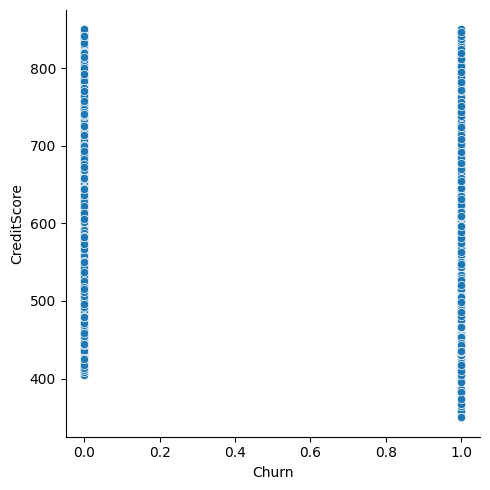

In [ ]:
sns.relplot(data=df, x='Churn' , y='CreditScore')

In [ ]:
df.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.746300,0.454300,38.921800,5.012800,76485.889288,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,0.000000,0.000000,37.000000,5.000000,97198.540000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.groupby('Churn')['CreditScore'].mean()

Churn
0    651.853196
1    645.351497
Name: CreditScore, dtype: float64

In [ ]:
df.groupby('Churn')['CreditScore'].min()

Churn
0    405
1    350
Name: CreditScore, dtype: int64

##**Conclusion**
***
###- Average credit score for customer who leave or not leave are almost equal which means credit score has no significant impact over people leaving.
###- Credit Score between 350 to 405 are most probably to leave.

<Axes: xlabel='Churn', ylabel='Age'>

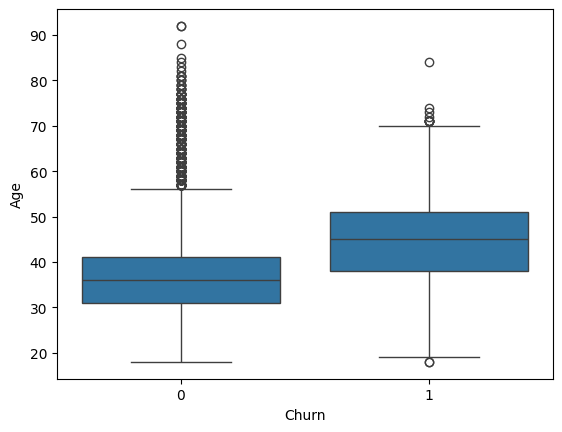

In [ ]:
sns.boxplot(data=df, x='Churn', y='Age')

##**Conclusion**
***
###- Outlier present in age column we have to remove in order to get correct relationship between age and churn

##**Finding outlier for Age where Churn==0**
***

In [ ]:
quartile_3=df[df['Churn']==0]['Age'].quantile(0.75)
quartile_1=df[df['Churn']==0]['Age'].quantile(0.25)
IQR=quartile_3-quartile_1
Upper_Range_Churn_0=quartile_3+(1.5*IQR)
Lower_Range_Churn_0=quartile_1-(1.5*IQR)
Lower_Range_Churn_0,Upper_Range_Churn_0



(16.0, 56.0)

##**Finding outlier for Age where Churn==1**
***

In [ ]:
quartile_3=df[df['Churn']==1]['Age'].quantile(0.75)
quartile_1=df[df['Churn']==1]['Age'].quantile(0.25)
IQR=quartile_3-quartile_1
Upper_Range_Churn_1=quartile_3+(1.5*IQR)
Lower_Range_Churn_1=quartile_1-(1.5*IQR)
Lower_Range_Churn_1,Upper_Range_Churn_1



(18.5, 70.5)

In [ ]:
df = df[(df['Churn']!=0) | (df['Age'] <= Upper_Range_Churn_0)]


In [ ]:
df[df['Age']>56.0]['Churn'].value_counts()

Churn
1    244
Name: count, dtype: int64

In [ ]:
10000-486

9514

In [ ]:
#9514-11= 9503
df[df['Age']>70.5]['Churn'].value_counts()

Churn
1    11
Name: count, dtype: int64

In [ ]:
# rmove outiers for churn ==1
data2 = df[(df['Churn']!=1) | (df['Age'] <= Upper_Range_Churn_1)]
data2.shape

(9503, 10)

In [ ]:
data2.shape

(9503, 10)

In [ ]:
10000-486-11


9503

In [ ]:
data2.shape

(9503, 10)

In [ ]:
data2['Churn'].value_counts()

Churn
0    7477
1    2026
Name: count, dtype: int64

In [ ]:
data2[data2['Age']<18.5]['Churn'].value_counts()


Churn
0    20
1     2
Name: count, dtype: int64

In [ ]:
data2=data2[(data2['Age']>=18.5) | (data2['Churn']!=1 )]

In [ ]:
#9503-2 =9501
data2.shape

(9501, 10)

In [ ]:
10000-486-11-2

9501

##*Nowe we removed all the rows where outliers present*
***

In [ ]:
data2['Churn'].value_counts()

Churn
0    7477
1    2024
Name: count, dtype: int64

In [ ]:
data2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,
15634602,619,0,1,42,2,0.00,1,1,101348.88,1
15647311,608,2,1,41,1,83807.86,0,1,112542.58,0
15619304,502,0,1,42,8,159660.80,1,0,113931.57,1
15701354,699,0,1,39,1,0.00,0,0,93826.63,0
15737888,850,2,1,43,2,125510.82,1,1,79084.10,0


In [ ]:
data2.shape

(9501, 10)

<Axes: xlabel='Churn', ylabel='Age'>

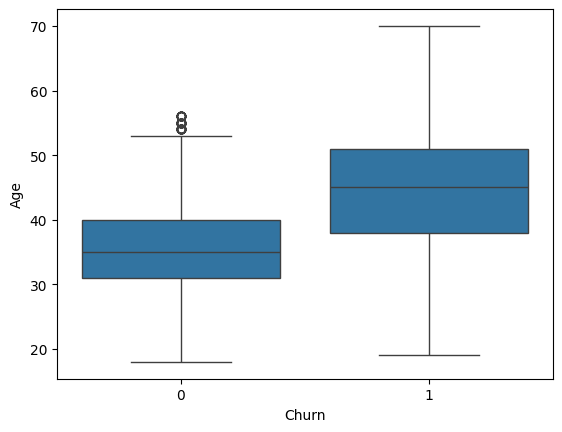

In [ ]:
sns.boxplot(data=data2, x='Churn', y='Age')

In [ ]:
quartile_3=data2[data2['Churn']==0]['Age'].quantile(0.75)
quartile_1=data2[data2['Churn']==0]['Age'].quantile(0.25)
IQR=quartile_3-quartile_1
Upper_Range_Churn_0=quartile_3+(1.5*IQR)
Lower_Range_Churn_0=quartile_1-(1.5*IQR)
Lower_Range_Churn_0,Upper_Range_Churn_0



(17.5, 53.5)

In [ ]:
data2=data2[(data2['Age']<=Upper_Range_Churn_0) | (data2['Churn']!=0 )]

In [ ]:
data2.shape

(9414, 10)

<Axes: xlabel='Churn', ylabel='Age'>

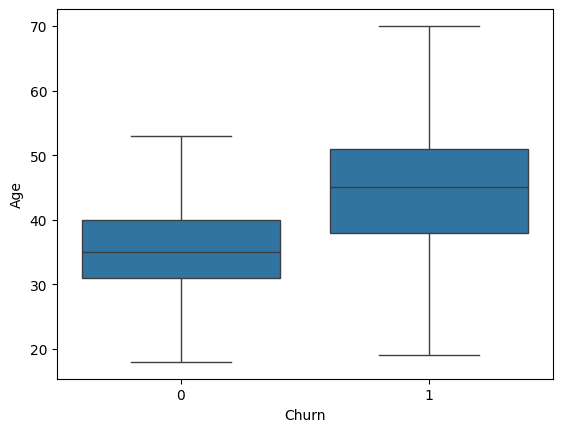

In [ ]:
sns.boxplot(data=data2, x='Churn', y='Age')

###**All outliers get removed now**
***

<Axes: xlabel='Age', ylabel='Churn'>

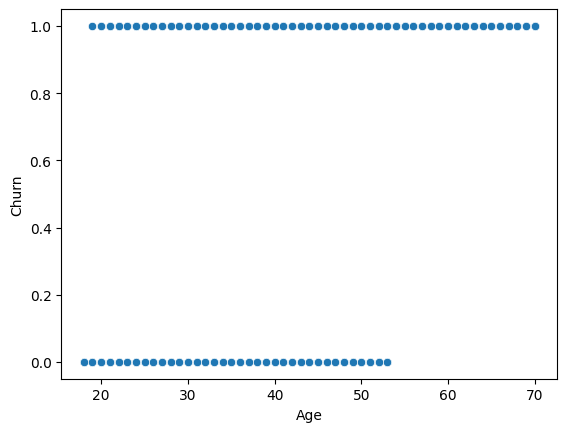

In [ ]:
sns.scatterplot(data=data2, x='Age', y='Churn')

In [ ]:
data2.groupby('Churn')['Age'].mean()

Churn
0    35.346820
1    44.712945
Name: Age, dtype: float64

In [ ]:
data2.groupby('Churn')['Age'].max()

Churn
0    53
1    70
Name: Age, dtype: int64

In [ ]:
data2[(data2['Age']>53) & (data2['Age']<70)]['Churn'].value_counts()

Churn
1    378
Name: count, dtype: int64

##**Conclusion**
- Age btween 53-70 are people who are most probably leaving.
***
 - **On  an average, the people leaving are more aged than people not leaving**
 - **Aged people are more likely to leave whose age is greater than 53**

In [ ]:
df=data2

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,
15634602,619,0,1,42,2,0.00,1,1,101348.88,1
15647311,608,2,1,41,1,83807.86,0,1,112542.58,0
15619304,502,0,1,42,8,159660.80,1,0,113931.57,1
15701354,699,0,1,39,1,0.00,0,0,93826.63,0
15737888,850,2,1,43,2,125510.82,1,1,79084.10,0


In [ ]:
df.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,9414.000000,9414.000000,9414.000000,9414.000000,9414.000000,9414.000000,9414.000000,9414.000000,9414.000000,9414.000000
mean,650.374867,0.744105,0.456023,37.360527,5.010410,76794.358718,0.704801,0.488846,100405.863026,0.214999
std,96.705603,0.824860,0.498089,8.451802,2.890306,62374.704054,0.456156,0.499902,57552.966569,0.410843
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,11.580000,0.000000
25%,583.000000,0.000000,0.000000,31.000000,3.000000,0.000000,0.000000,0.000000,51348.707500,0.000000
50%,651.000000,0.000000,0.000000,37.000000,5.000000,97490.975000,1.000000,0.000000,100661.590000,0.000000
75%,718.000000,1.000000,1.000000,42.000000,7.000000,127781.902500,1.000000,1.000000,149614.070000,0.000000
max,850.000000,2.000000,1.000000,70.000000,10.000000,250898.090000,1.000000,1.000000,199992.480000,1.000000


In [ ]:

df[(df['Tenure']==1) & (df['Churn']==0)]

,CreditScore,Geography,Gender,Age,Tenure,Balance,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,
15647311,608,2,1,41,1,83807.86,0,1,112542.58,0
15701354,699,0,1,39,1,0.00,0,0,93826.63,0
15760861,619,0,0,43,1,125211.92,1,1,113410.49,0
15702014,555,2,0,33,1,56084.69,0,0,178798.13,0
15696061,581,1,1,34,1,101633.04,1,0,110431.51,0
...,...,...,...,...,...,...,...,...,...,...
15643575,757,1,0,36,1,65349.71,0,0,64539.64,0
15603674,803,0,0,36,1,0.00,1,1,149370.93,0
15735078,724,1,1,53,1,139687.66,1,1,12913.92,0


In [ ]:
list=df.groupby('Tenure')['Churn'].value_counts()

In [ ]:
list

Tenure  Churn
0       0        291
        1         95
1       0        742
        1        232
2       0        789
        1        201
3       0        740
        1        212
4       0        736
        1        201
5       0        739
        1        208
6       0        718
        1        194
7       0        796
        1        174
8       0        770
        1        194
9       0        706
        1        213
10      0        363
        1        100
Name: count, dtype: int64

In [ ]:
len(list)

22

In [ ]:
list[1: :2]

Tenure  Churn
0       1         95
1       1        232
2       1        201
3       1        212
4       1        201
5       1        208
6       1        194
7       1        174
8       1        194
9       1        213
10      1        100
Name: count, dtype: int64

In [ ]:
list[0: :2]

Tenure  Churn
0       0        291
1       0        742
2       0        789
3       0        740
4       0        736
5       0        739
6       0        718
7       0        796
8       0        770
9       0        706
10      0        363
Name: count, dtype: int64

##**Conclusion**
***
###- People leaving has not significantly affected by tenure.

In [ ]:
df.groupby('Churn')['Estimated Salary'].mean()

Churn
0    100128.830348
1    101417.360800
Name: Estimated Salary, dtype: float64

In [ ]:
df.groupby('Churn')['Estimated Salary'].max()

Churn
0    199992.48
1    199808.10
Name: Estimated Salary, dtype: float64

##**Conclusion**
***
- People don't leave because of their low estimated salary.
- As average salary is almost equal of person leaving or staying.




In [ ]:
df.groupby('Churn')['Balance'].mean()

Churn
0    72846.568200
1    91208.475282
Name: Balance, dtype: float64

In [ ]:
df[(df['Balance']==0) & (df['Churn']==1)]

,CreditScore,Geography,Gender,Age,Tenure,Balance,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,
15634602,619,0,1,42,2,0.0,1,1,101348.88,1
15699309,510,2,1,38,4,0.0,1,0,118913.53,1
15589475,591,2,1,39,3,0.0,1,0,140469.38,1
15623944,511,2,1,66,4,0.0,1,0,1643.11,1
15663706,777,0,1,32,2,0.0,1,0,136458.19,1
...,...,...,...,...,...,...,...,...,...,...
15687626,527,0,0,39,4,0.0,1,0,167183.07,1
15686974,751,0,1,48,4,0.0,0,1,30165.06,1
15746569,589,0,0,38,4,0.0,1,0,95483.48,1


In [ ]:
len(df[(df['Balance']==0) & (df['Churn']==1)])

495

In [ ]:
len(df[(df['Balance']==0) & (df['Churn']==0)])

2889

In [ ]:
df['Balance'].value_counts()

Balance
0.00         3384
130170.82       2
133903.12       1
95502.21        1
109106.80       1
             ... 
118004.26       1
97286.16        1
109628.44       1
103138.17       1
130142.79       1
Name: count, Length: 6030, dtype: int64

<Axes: xlabel='Balance', ylabel='Count'>

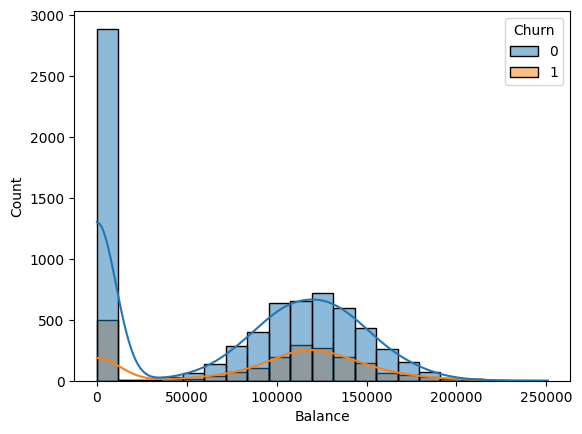

In [ ]:
sns.histplot(data=df, x='Balance', hue='Churn',kde=True)

##**Conclusion**
***
- Most of the bank customers have zero balance in their bank.
- Most of the people having zero balance and still not lefting the bank.
- After a certain amount of balance :-
  - balance increases, number of people leaving the bank decreases.


In [ ]:
df.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,9414.000000,9414.000000,9414.000000,9414.000000,9414.000000,9414.000000,9414.000000,9414.000000,9414.000000,9414.000000
mean,650.374867,0.744105,0.456023,37.360527,5.010410,76794.358718,0.704801,0.488846,100405.863026,0.214999
std,96.705603,0.824860,0.498089,8.451802,2.890306,62374.704054,0.456156,0.499902,57552.966569,0.410843
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,11.580000,0.000000
25%,583.000000,0.000000,0.000000,31.000000,3.000000,0.000000,0.000000,0.000000,51348.707500,0.000000
50%,651.000000,0.000000,0.000000,37.000000,5.000000,97490.975000,1.000000,0.000000,100661.590000,0.000000
75%,718.000000,1.000000,1.000000,42.000000,7.000000,127781.902500,1.000000,1.000000,149614.070000,0.000000
max,850.000000,2.000000,1.000000,70.000000,10.000000,250898.090000,1.000000,1.000000,199992.480000,1.000000


##We can remove columns like Tenure, Has Credit Score,Estimated Salary as they are not affected the prediction

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,
15634602,619,0,1,42,2,0.00,1,1,101348.88,1
15647311,608,2,1,41,1,83807.86,0,1,112542.58,0
15619304,502,0,1,42,8,159660.80,1,0,113931.57,1
15701354,699,0,1,39,1,0.00,0,0,93826.63,0
15737888,850,2,1,43,2,125510.82,1,1,79084.10,0


In [ ]:
df.shape

(9414, 10)

In [ ]:
remove_columns=['Tenure','Has Credit Card','Estimated Salary']
df.drop(columns=remove_columns, inplace=True)

In [ ]:
df.shape


(9414, 7)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Balance,Is Active Member,Churn
CustomerId,,,,,,,
15634602,619,0,1,42,0.00,1,1
15647311,608,2,1,41,83807.86,1,0
15619304,502,0,1,42,159660.80,0,1
15701354,699,0,1,39,0.00,0,0
15737888,850,2,1,43,125510.82,1,0


<Axes: xlabel='CreditScore', ylabel='Count'>

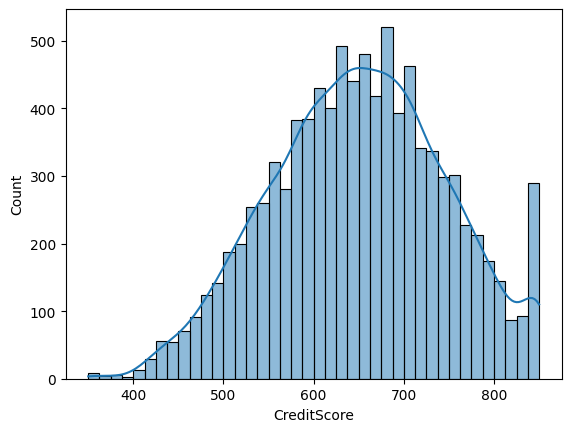

In [ ]:
sns.histplot(data=df,x='CreditScore', kde=True)

<Axes: xlabel='Age', ylabel='Count'>

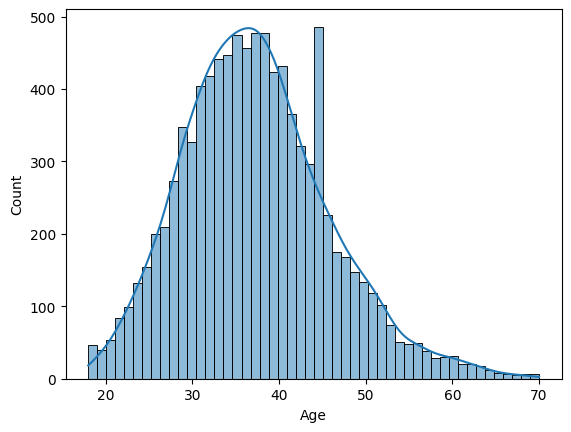

In [ ]:
sns.histplot(data=df,x='Age', kde=True)

<Axes: xlabel='Balance', ylabel='Count'>

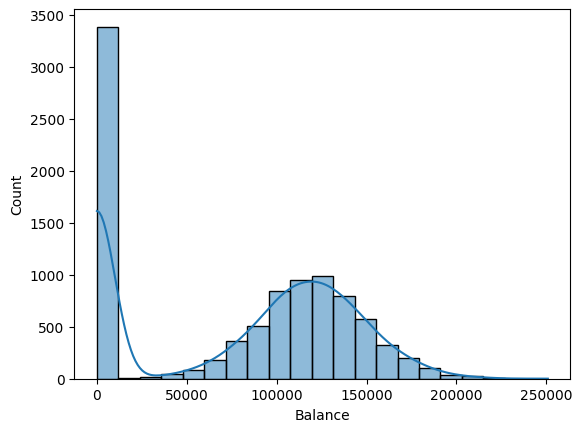

In [ ]:
sns.histplot(data=df,x='Balance', kde=True)

###All these Columns distrivution are Normally Distributed so we can apply FEATURE LEARNING TECHNIQUE - STANDARDIZATION

In [ ]:
import scipy
from scipy import stats

In [ ]:
columns=['CreditScore', 'Geography', 'Gender','Age','Balance','Is Active Member']

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Balance,Is Active Member,Churn
CustomerId,,,,,,,
15634602,619,0,1,42,0.00,1,1
15647311,608,2,1,41,83807.86,1,0
15619304,502,0,1,42,159660.80,0,1
15701354,699,0,1,39,0.00,0,0
15737888,850,2,1,43,125510.82,1,0


In [ ]:
#doing standardization using zcore formula: (valuei-meani/stdi) using scipy

# zscore--(df['col1'] - df['col1'].mean()) / df['col1'].std() formula

for i in columns:
  df[i]=stats.zscore(df[i])




In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Balance,Is Active Member,Churn
CustomerId,,,,,,,
15634602,-0.324454,-0.902146,1.092187,0.548962,-1.231243,1.022562,1
15647311,-0.438207,1.522637,1.092187,0.430638,0.112447,1.022562,0
15619304,-1.534376,-0.902146,1.092187,0.548962,1.328597,-0.977936,1
15701354,0.502843,-0.902146,1.092187,0.193989,-1.231243,-0.977936,0
15737888,2.064366,1.522637,1.092187,0.667286,0.781071,1.022562,0


In [ ]:
X=df[['CreditScore','Geography','Gender','Age','Balance','Is Active Member']]
Y=df['Churn']

In [ ]:
X.shape,Y.shape

((9414, 6), (9414,))

<Axes: xlabel='Churn', ylabel='Geography'>

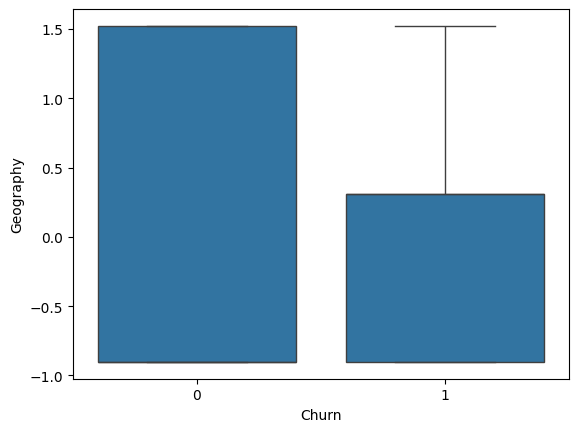

In [ ]:
sns.boxplot(data=df, x='Churn', y='Geography')

<Axes: xlabel='Churn', ylabel='Balance'>

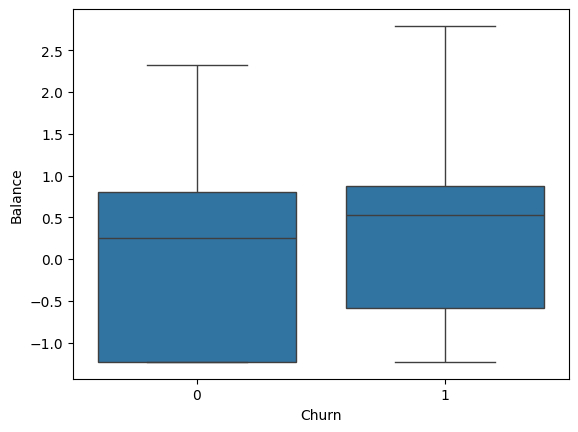

In [ ]:
sns.boxplot(data=df, x='Churn', y='Balance')

<Axes: xlabel='Churn', ylabel='CreditScore'>

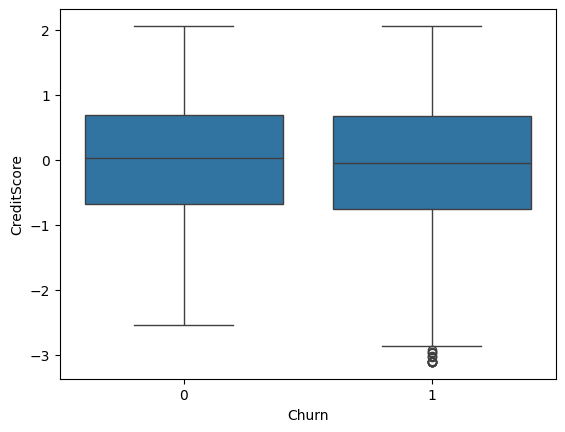

In [ ]:
sns.boxplot(data=df, x='Churn', y='CreditScore')

<Axes: xlabel='Churn', ylabel='Gender'>

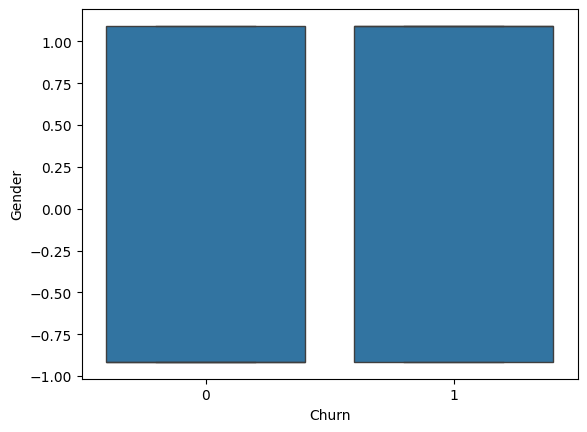

In [ ]:
sns.boxplot(data=df, x='Churn', y='Gender')

<Axes: xlabel='Churn', ylabel='Age'>

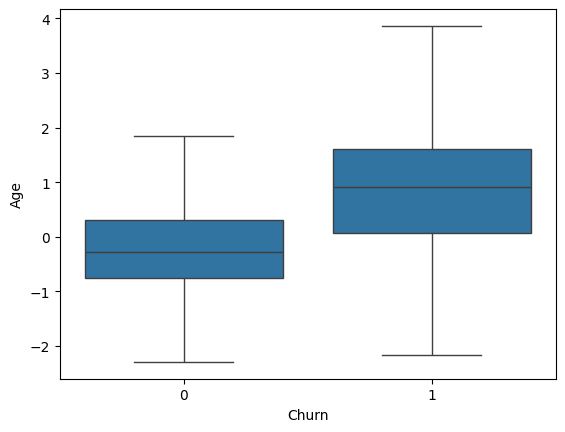

In [ ]:
sns.boxplot(data=df, x='Churn', y='Age')

<Axes: xlabel='Churn', ylabel='Is Active Member'>

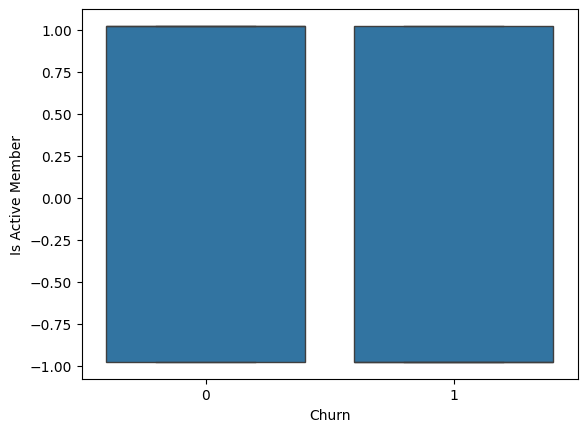

In [ ]:
sns.boxplot(data=df, x='Churn', y='Is Active Member')

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Balance,Is Active Member,Churn
CustomerId,,,,,,,
15634602,-0.324454,-0.902146,1.092187,0.548962,-1.231243,1.022562,1
15647311,-0.438207,1.522637,1.092187,0.430638,0.112447,1.022562,0
15619304,-1.534376,-0.902146,1.092187,0.548962,1.328597,-0.977936,1
15701354,0.502843,-0.902146,1.092187,0.193989,-1.231243,-0.977936,0
15737888,2.064366,1.522637,1.092187,0.667286,0.781071,1.022562,0


In [ ]:
df['Churn'].value_counts()

Churn
0    7390
1    2024
Name: count, dtype: int64

#Handling Imbalance datset before training
***
- appply oversampling not undersampling bcs w edont want to loss the data

In [ ]:
X.shape,Y.shape

((9414, 6), (9414,))

<Axes: ylabel='Frequency'>

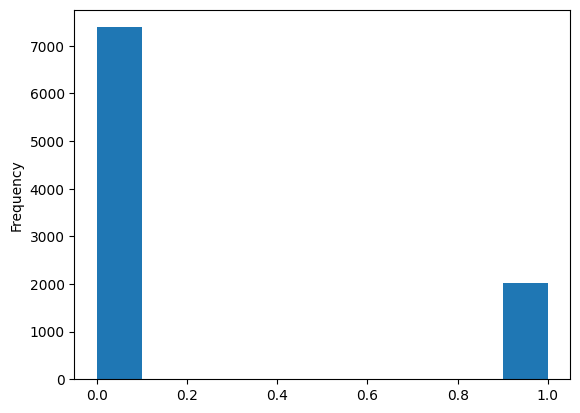

In [ ]:
Y.plot(kind='hist')

In [ ]:
Y.value_counts()

Churn
0    7390
1    2024
Name: count, dtype: int64

In [ ]:
#Highly Imbalance dataset

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=1234)
X_ros, Y_ros= ros.fit_resample( X,Y)



In [ ]:
X_ros.shape,Y_ros.shape,X.shape,Y.shape

((14780, 6), (14780,), (9414, 6), (9414,))

Dataset get balanced now

In [ ]:
Y_ros.value_counts()

Churn
1    7390
0    7390
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

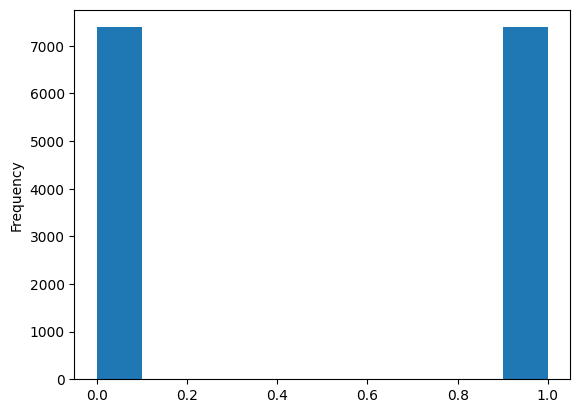

In [ ]:
Y_ros.plot(kind='hist')

Train Test Split data :
   - with raw data
   - with oversampled data
   


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=1234)

In [ ]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((7060, 6), (2354, 6), (7060,), (2354,))

In [ ]:
Y_train.value_counts()

Churn
0    5540
1    1520
Name: count, dtype: int64

In [ ]:

X_train_ros,X_test_ros,Y_train_ros,Y_test_ros=train_test_split(X_ros,Y_ros,test_size=0.25,random_state=1234)

In [ ]:
Y_train_ros.value_counts()

Churn
0    5547
1    5538
Name: count, dtype: int64

In [ ]:
X_train_ros.head()

,CreditScore,Geography,Gender,Age,Balance,Is Active Member
3437,-1.120727,-0.902146,-0.915594,-0.397632,0.389950,-0.977936
3996,-1.658470,-0.902146,-0.915594,-0.989253,-1.231243,-0.977936
11653,-2.537473,-0.902146,-0.915594,0.193989,-1.231243,-0.977936
3325,1.536964,-0.902146,1.092187,-0.870929,-1.231243,-0.977936
11104,0.606255,-0.902146,1.092187,-0.160983,-1.231243,1.022562


#model selection and traininig with raw data
***
## using SVM Classifier for this task

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc=SVC()

In [ ]:
svc.fit(X_train,Y_train)

SVC()

In [ ]:
y_pred=svc.predict(X_test)

#model accuracy
***

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.8364485981308412

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
confusion_matrix(Y_test,y_pred)

array([[1812,   38],
       [ 347,  157]])

In [ ]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1850
           1       0.81      0.31      0.45       504

    accuracy                           0.84      2354
   macro avg       0.82      0.65      0.68      2354
weighted avg       0.83      0.84      0.81      2354



###clearly visible that recall for predicting 1 is so low ie 31% even do model have good accuracy bcs data is imbalance so it predict mor eof 0 but less 1  thts why recall and precision ofr 0 is good bu tnot for 1

##Similarly do the model training with oversample data and find model accuracy

In [ ]:
from sklearn.svm import SVC

svc_ros=SVC()

In [ ]:
svc_ros.fit(X_train_ros,Y_train_ros)

SVC()

In [ ]:
y_pred=svc_ros.predict(X_test_ros)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test_ros,y_pred)

0.7464140730717186

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
confusion_matrix(Y_test_ros,y_pred)

array([[1480,  363],
       [ 574, 1278]])

In [ ]:
print(classification_report(Y_test_ros,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76      1843
           1       0.78      0.69      0.73      1852

    accuracy                           0.75      3695
   macro avg       0.75      0.75      0.75      3695
weighted avg       0.75      0.75      0.75      3695



##Model with oversampling data trained even though its accuracy sore is less than raw data training a sits 75% ie less than 84% but recall for 1 is 69 %here which means this modeel perform more good inpredicting 1 which is our main goal

##**Hyperparameter tuning using Grid search CV**
***

In [ ]:
param_grid={'C':[0.1,1,10],
            'gamma':[1,0.1,0.01],
            'kernel':['rbf'],
            'class_weight':['balanced']}

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
grid_ros=GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv=2)

In [ ]:
grid_ros.fit(X_train_ros,Y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.1s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.6s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.6s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [ ]:
grid_predictions_ros=grid_ros.predict(X_test_ros)

In [ ]:
confusion_matrix(Y_test_ros,grid_predictions_ros)

array([[1456,  387],
       [ 403, 1449]])

In [ ]:
print(classification_report(Y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79      1843
           1       0.79      0.78      0.79      1852

    accuracy                           0.79      3695
   macro avg       0.79      0.79      0.79      3695
weighted avg       0.79      0.79      0.79      3695



###With hyperparameter tuning we enhnace our model accuracy from 75% to 79% and recall went from 69% to78%